In [1]:
import matplotlib.pyplot as plt
import torch

In [4]:
def print_sample(input, ground_truth, generated_img, row=0):
    input = input.detach().cpu()
    ground_truth = ground_truth.detach().cpu()
    generated_img = generated_img.squeeze().detach().cpu()
    # denormalize
    if (torch.cuda.is_available()):
        input = (input * 255).type(torch.uint8)
        ground_truth = (ground_truth * 255).type(torch.uint8)
        generated_img = (generated_img * 255).type(torch.uint8)

    imgs = [input, ground_truth, generated_img]
    _, axs = plt.subplots(ncols=3, squeeze=False)
    axs[0, 0].set_title('input')
    axs[0, 1].set_title('ground_truth')
    axs[0, 2].set_title('output')
    for i, img in enumerate(imgs):
        axs[row, i].imshow(img.permute(1, 2, 0).type(torch.uint8))
        axs[row, i].set_xticklabels([])
        axs[row, i].set_yticklabels([])
    plt.show()

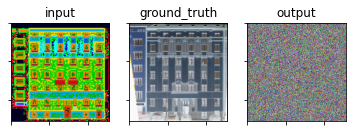

In [5]:
from torchvision.io import read_image
from pathlib import Path
import torch

img = read_image(path=str(Path('./data/facades/test/1.jpg')))
print_sample(img[:, :, 256:], img[:, :, :256], generated_img=torch.randn(1,3, 256,256))